### (0 баллов) Считываем данные

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [4]:
X = dataset['data']
X[:10].shape

(10, 13)

In [5]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [7]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Нормализуем данные
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [11]:
lin_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
print(f'Intercept: {lin_reg.intercept_:.3f}')
print(f'Array of coefficients:\n{np.array_str(lin_reg.coef_, precision=2)}')

Intercept: 22.600
Array of coefficients:
[-1.03  0.93  0.15  0.7  -2.15  2.64  0.13 -3.09  2.71 -1.99 -2.05  0.94
 -3.92]


In [12]:
y_pred = lin_reg.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [13]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return 1/y_real.size * np.linalg.norm(y_real - y_pred)**2

In [14]:
my_MSE = MSE(y_test, y_pred)
sklearn_MSE = mean_squared_error(y_test, y_pred)
print(f"my MSE = {my_MSE}")
print(f"sklearn MSE = {sklearn_MSE}")
print(f'delta MSE = {my_MSE - sklearn_MSE}')

my MSE = 14.995852876582639
sklearn MSE = 14.99585287658264
delta MSE = -1.7763568394002505e-15


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [15]:
# реализуем наивное предсказание
y_train_mean = np.mean(y_train)
y_pred_naive = np.ones_like(y_test)*y_train_mean

In [16]:
# сравнвим линейную регрессию с наивным алгоритмом
MSE_lin_reg = MSE(y_test, y_pred)
MSE_naive = MSE(y_test, y_pred_naive)
print(f"MSE linear regression = {MSE_lin_reg:.5f}")
print(f"MSE naive algorithm = {MSE_naive:.5f}")

MSE linear regression = 14.99585
MSE naive algorithm = 65.00803


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

MSE without regularization = 14.99585
MSE with optimal (lambda = 62.10) regularization = 14.48242


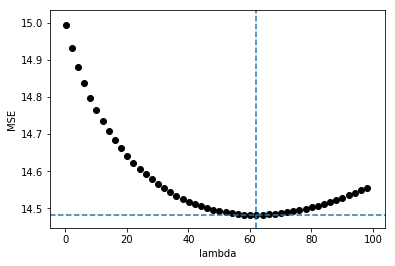

In [17]:
# choose the range for lambdas
lambdas_l2 = np.arange(0.1, 100.0, 2)

lambda_mses_l2 = []

for l in lambdas_l2:
    ridge_k = Ridge(alpha=l).fit(X_train, y_train)
    y_pred_k = ridge_k.predict(X_test)
    lambda_mses_l2.append((l, MSE(y_test, y_pred_k)))

best_lambda_l2, best_test_mse_l2 = min(lambda_mses_l2, key=lambda x: x[1])
print(f"MSE without regularization = {MSE_lin_reg:.5f}")
print(f"MSE with optimal (lambda = {best_lambda_l2:.2f}) regularization = {best_test_mse_l2:.5f}")

_, ax = plt.subplots()
for item in lambda_mses_l2:
    ax.scatter(item[0], item[1], color='k')
ax.axhline(best_test_mse_l2, linestyle='dashed')
ax.axvline(best_lambda_l2, linestyle='dashed')
ax.set_xlabel('lambda')
ax.set_ylabel('MSE')
plt.show()

MSE without regularization = 14.99585
MSE with optimal (lambda = 0.001) regularization = 14.55569


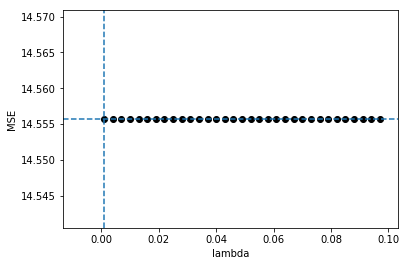

In [18]:
# choose the range for lambdas
lambdas_l1 = np.arange(0.001, 0.1, 0.003)

lambda_mses_l1 = []

for l in lambdas_l1:
    lasso_k = Lasso(alpha=l).fit(X_train, y_train)
    y_pred_k = ridge_k.predict(X_test)
    lambda_mses_l1.append((l, MSE(y_test, y_pred_k)))

best_lambda_l1, best_test_mse_l1 = min(lambda_mses_l1, key=lambda x: x[1])
print(f"MSE without regularization = {MSE_lin_reg:.5f}")
print(f"MSE with optimal (lambda = {best_lambda_l1:.3f}) regularization = {best_test_mse_l1:.5f}")

_, ax = plt.subplots()
for item in lambda_mses_l1:
    ax.scatter(item[0], item[1], color='k')
ax.axhline(best_test_mse_l1, linestyle='dashed')
ax.axvline(best_lambda_l1, linestyle='dashed')
ax.set_xlabel('lambda')
ax.set_ylabel('MSE')
plt.show()

Попробуем убрать некоторые признаки. Я реализовывал примитивный метод отброса признаков для датасета про диабет, здесь сразу воспользуюсь встроенной функцией sklearn.

In [19]:
from sklearn.feature_selection import RFECV

In [20]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [28]:
# воспользуемся recursive feature elimination с перекрестной валидацией
n_folds = 5
rfecv = RFECV(
    estimator=LinearRegression(),
    step=1,
    cv=n_folds,
    scoring="neg_mean_squared_error"
)
rfecv.fit(X_scaled, y)
print("Eliminated features: ", end='')
print(dataset['feature_names'][~rfecv.support_])
print("Remaining features: ", end='')
print(dataset['feature_names'][rfecv.support_])

Eliminated features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'AGE' 'RAD' 'TAX' 'B']
Remaining features: ['NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


In [69]:
red_feature_names = dataset['feature_names'][rfecv.support_]
X_train_red = X_train[:, rfecv.support_]
X_test_red = X_test[:, rfecv.support_]

(51, 5)

In [64]:
lin_reg_red = LinearRegression(fit_intercept=True).fit(X_train_red, y_train)
y_pred_red = lin_reg_red.predict(X_test_red)
MSE_lin_reg = MSE(y_test, y_pred_red)
print(f"MSE after feature elimination = {MSE_lin_reg:.5f}")

MSE after feature elimination = 15.86682


MSE немного увеличился, но количество признаков сильно уменьшилось. Теперь  можно детально изучить и визуализировать каждый признак и попытаться найти нетривиальные зависимости.

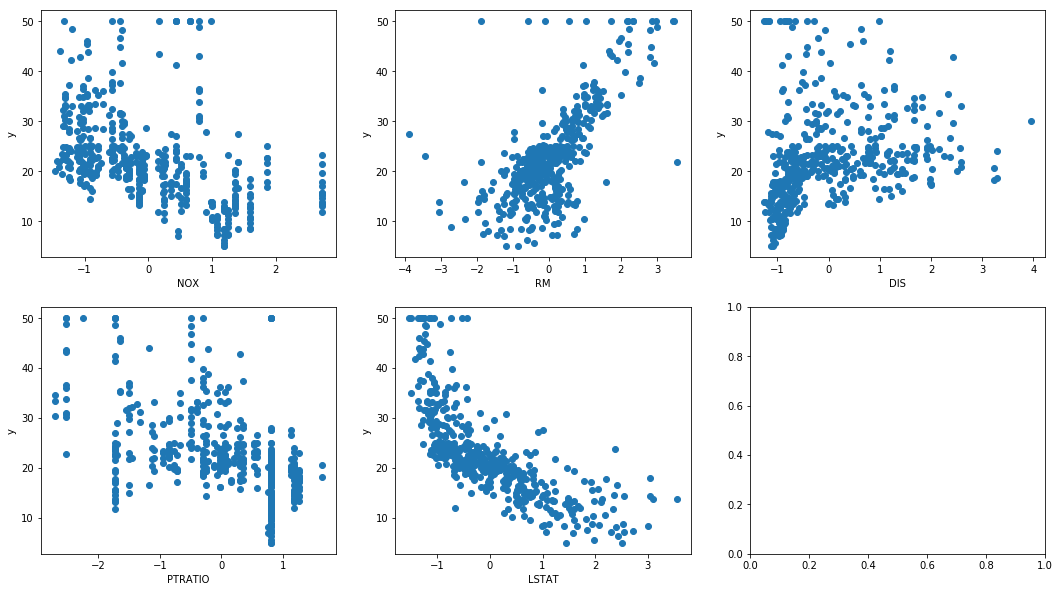

In [34]:
_, axs = plt.subplots(2,3, figsize=(18,10))
for k, ax in enumerate(axs.reshape(-1)):
    try:
        ax.scatter(X_train_red[:,k], y_train)
        ax.set_xlabel(red_feature_names[k])
        ax.set_ylabel('y')
    except IndexError:
        pass
plt.show()

Для LSTAT зависимость явно нелинейная, рассмотрим какие можно добавить признаки, чтобы лучше приблизить зависимость

Coefficients = [7.17660118 0.93129596]


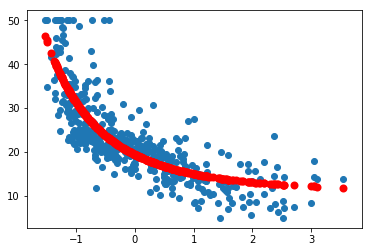

In [72]:
x_lstat = X_train_red[:,[4]]
x_lstat_modified = np.hstack((np.power(2,-x_lstat), np.power(6,-x_lstat)))
lin_reg_lstat = Ridge(fit_intercept=True)
lin_reg_lstat.fit(x_lstat_modified, y_train)
print(f'Coefficients = {lin_reg_lstat.coef_}')

y_pred_train = lin_reg_lstat.predict(x_lstat_modified)

_, ax = plt.subplots()
ax.scatter(x_lstat, y_train)
ax.scatter(x_lstat, y_pred_train, color='r', linewidth=2)
plt.show()

Coefficients = [-3.13384514  3.66087265  4.13082878]


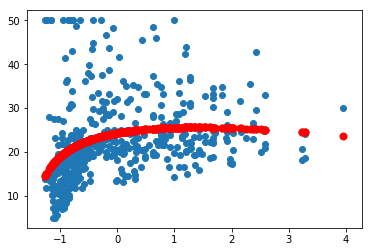

In [135]:
x_dis = X_train_red[:,[2]]
x_dis_modified = np.hstack((x_dis, np.power(x_dis+1.5, 1/2), np.log2(x_dis+1.5)))
lin_reg_dis = Ridge(fit_intercept=True)
lin_reg_dis.fit(x_dis_modified, y_train)
print(f'Coefficients = {lin_reg_dis.coef_}')

y_pred_train = lin_reg_dis.predict(x_dis_modified)

_, ax = plt.subplots()
ax.scatter(x_dis, y_train)
ax.scatter(x_dis, y_pred_train, color='r', linewidth=2)
plt.show()

Добавление логарифмического признака и корня не помогло улучшить метрику, к сожалению

In [152]:
def engineer_features(X):
    t1_ = np.hstack((np.power(2,-X[:,[4]]), np.power(6,-X[:,[4]])))
    return np.hstack((X[:,:4], t1_))

In [153]:
# X_train_engineered = np.hstack((X_train_red[:,:4], np.power(2,-X_train_red[:,[4]]), np.power(6,-X_train_red[:,[4]])))
X_train_engineered = engineer_features(X_train_red)
# X_test_engineered = np.hstack((X_test_red[:,:4], np.power(2,-X_test_red[:,[4]]), np.power(6,-X_test_red[:,[4]])))
X_test_engineered = engineer_features(X_test_red)

lin_reg_eng = Ridge(fit_intercept=True).fit(X_train_engineered, y_train)
y_pred_red = lin_reg_eng.predict(X_test_engineered)
MSE_lin_reg = MSE(y_test, y_pred_red)
print(f"MSE after feature engineering = {MSE_lin_reg:.5f}")

MSE after feature engineering = 11.26270


Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация не сильно помогает в улучшении метрики, потому что модель не переобучается. После нормализации данных с помощью StandardScalar, оптимальный коэффициент L2 регуляризации очень большой. Первый раз такое вижу, чтобы коэффициент 62.1 был самым оптимальным. При этом MSE уменньшился с 14.99 до 14.48. Для L1 регуляризации оптимальный коэффициент -- самый маленький среди выбранной сетки, а MSE на тестовом датасете 14.55.

Пробовал находить неленинейные трансформации признаков чтобы улучшить предсказание, но единственное, что привело к улучшению было модификация признака LSTAT экспоненцианльными функциями.